# Cabinet Start-Up Procedure

1. Turn on cabinet power in back of cabinet
2. Turn on sensor power (24 Volts). The sensor power inputs are labeled.
3. Compile code to AMDC
4. Turn on power to DC bus of cabinet.
5. Run Jupyter Notebook. 

Import neccessary modules

In [ ]:
amdc.disconnect()

In [3]:

from AMDC import AMDC
from Cabinet_CMD import cmd
import sys
sys.path.append(r'..\AMDC-Firmware\scripts')



USE_ETHERNET = True

if not USE_ETHERNET:
    amdc = AMDC()
    amdc.setup_comm_defaults('uart')
    amdc.uart_init('COM5')
else:
    amdc = AMDC()
    amdc.setup_comm_defaults('eth')
    amdc.eth_init()
    s0, s0_id = amdc.eth_new_socket('ascii_cmd')
    amdc.eth_set_default_ascii_cmd_socket(s0)



ModuleNotFoundError: No module named 'serial'

In [6]:
Vdc = 200
cmd = cmd(Vdc, amdc, debug = False)

SerialException: Attempting to use a port that is not open

In [11]:

Vdc = 60
cmd_str = 'bim init'
amdc.cmd(cmd_str) 
#amdc.cmd(set_vdc_all(60))

	> bim init
['bim init', 'SUCCESS']


['bim init', 'SUCCESS']

In [ ]:
cmd.disable_pwm()
cmd.bim_deinit()

In [ ]:
amdc.cmd(bim_init())

In [ ]:
cmd.bim_init()

In [ ]:
cmd.bim_set_Vdc_tq(60)
cmd.bim_set_Vdc_s1(60)
cmd.bim_set_id(1)
cmd.bim_enable_ctrl()
cmd.enable_pwm()



In [ ]:
cmd.bim_enable_ob()
#logger.clear_all()


In [ ]:
#logger.start()
cmd.bim_set_id(13.5)
cmd.bim_enable_vctrl()


In [ ]:

cmd.bim_set_deltaxy(0E-5, 0E-5)
cmd.bim_enable_levctrl()


In [ ]:
PI = 3.141592653589793238462643383279
cmd.bim_set_w(000.0*PI/30)

In [ ]:
cmd.bim_disable_levctrl()
cmd.bim_disable_vctrl()


In [ ]:
cmd.bim_set_Vdc_tq(60)
cmd.bim_set_Vdc_s1(60)
cmd.openloop_vsi_3_enable(2)
cmd.openloop_vsi_3(2,0,3)

cmd.enable_pwm()

In [15]:
import matplotlib
import time
import pathlib as pl
import sys
repo_dir = '..'                                      # CHANGE THIS TO YOUR REPO DIRECTORY
repo_dir = pl.Path(repo_dir)

from AMDC_Logger import AMDC_Logger, find_mapfile
from AMDC_LivePlot import AMDC_LivePlot
mapfile_path = find_mapfile(repo_dir)
logger = AMDC_Logger(AMDC = amdc, mapfile = mapfile_path)
logger.sync()

# View which variables are logged
logger.info()
#amdc.connect()
amdc.cmd('bim enable_log')
#cmd.enable_log()
logger.unregister_all()
samples_per_sec = 100
logger.register('Iabc1_a', var_type = 'double', samples_per_sec = samples_per_sec)
logger.register('Iabc1_b', var_type = 'double', samples_per_sec = samples_per_sec)
logger.register('Iabc1_c', var_type = 'double', samples_per_sec = samples_per_sec)


	> log info
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:
LOG_Iabc1_a           0            double              100.0                 0       
LOG_Iabc1_b           1            double              100.0                 0       
LOG_Iabc1_c           2            double              100.0                 0       

	> bim enable_log
['bim enable_log', 'SUCCESS']
	> log unreg 0
['log unreg 0', 'SUCCESS']
	> log unreg 1
['log unreg 1', 'SUCCESS']
	> log unreg 2
['log unreg 2', 'SUCCESS']
	> log reg 0 LOG_Iabc1_a 537636424 100 double
['log reg 0 LOG_Iabc1_a 537636424 100 double', 'SUCCESS']
	> log reg 1 LOG_Iabc1_b 537636432 100 double
['log reg 1 LOG_Iabc1_b 537636432 100 double', 'SUCCESS']
	> log reg 2 LOG_Iabc1_c 537636440 100 double
['log reg 2 LOG_Iabc1_c 537636440 100 double', 'SUCCESS']


	> log stream start 0 7
['log stream start 0 7', 'INVALID ARGUMENTS']


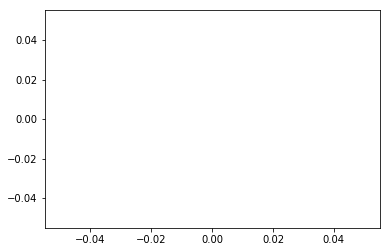

In [16]:

##### CELL START #####
p1 = AMDC_LivePlot(logger, 'Iabc1_a', window_sec = 1)
p1.start_stream()
p1.show()

##### CELL START #####
p2 = AMDC_LivePlot(logger, 'Iabc1_b', window_sec = 1)
p2.start_stream()
p2.show()

##### CELL START #####
p3 = AMDC_LivePlot(logger, 'Iabc1_c', window_sec = 1)
p3.start_stream()
p3.show()

In [ ]:
logger.unregister_all()
#logger.register('wrm_ref wrm wrm_hf Is1_x Is1_y Is1_x_ref Is1_y_ref Itq_d_ref Itq_q_ref Itq_d Itq_q delta_x delta_y', samples_per_sec = 5000, var_type = 'double')
#logger.register('delta_x delta_y F_x F_y Is1_x Is1_y Is1_x_ref Is1_y_ref Itq_d_ref Itq_q_ref Itq_d Itq_q wrm_ref wrm wrm_hf va1_ref vb1_ref vc1_ref', samples_per_sec = 10000, var_type = 'double')
logger.register('delta_x delta_y F_x F_y Is1_x Is1_y Is1_x_ref Is1_y_ref Itq_d_ref Itq_q_ref Itq_d Itq_q theta_rm theta_e wrm_ref wrm wsl', samples_per_sec = 500, var_type = 'double')

#logger.register('delta_x delta_y F_x F_y Is1_x Is1_y Is1_x_ref Is1_y_ref Itq_d_ref Itq_q_ref Itq_d Itq_q theta_rm theta_e wrm_ref wrm wsl', samples_per_sec = 500, var_type = 'double')
#logger.register('delta_x delta_y F_x F_y Is1_x Is1_y Is1_x_ref Is1_y_ref Itq_d_ref Itq_q_ref Itq_d Itq_q wrm_ref wrm', samples_per_sec = 5000, var_type = 'double')
#logger.register('delta_x delta_y F_x F_y' , samples_per_sec = 500, var_type = 'double')
#logger.register('theta_rm' , samples_per_sec = 500, var_type = 'double')
# View which variables are logged
logger.info()


In [ ]:
logger.empty_all()
logger.start()
#time.sleep(10)


In [ ]:
logger.stop()

####################   DUMP DATA AND PLOT   ####################
data = logger.dump(file = 'bim_data_test.csv')

In [ ]:
PI = 3.141592653589793238462643383279

In [ ]:
cmd.bim_set_theta_offset(PI/24)


In [ ]:
PI = 3.141592653589793238462643383279
cmd.bim_set_w(00.0*PI/30)
cmd.bim_set_deltaxy(0E-5, 0e-5)

In [ ]:
for x in [-10E-5, -9E-5,-8E-5, -7E-5, -6E-5, -5e-5]:
    for y in [-15e-5, -10e-5]:
        cmd.bim_set_deltaxy(x, y)
        time.sleep(10)
        logger.clear_all()
        logger.start()
        #DATA IS BEING RECORDED
        time.sleep(0.05)
        logger.stop()
        filename = 'bim_data_standstill_x_'+ str(x)+'_y_'+str(y)+'.csv'
        data = logger.dump(file = filename)

In [ ]:

###################   COLLECT DATA   ####################
# Clear the logger, then record data
logger.clear_all()
logger.start()
#DATA IS BEING RECORDED
time.sleep(0.05)
logger.stop()

####################   DUMP DATA AND PLOT   ####################
data = logger.dump(file = 'bim_data_w000RPM_vdc_100_80_ob1.8_lev10Hz_ba1.8_M1.5_lpf_300_x_5e-7.csv')


In [ ]:

logger.stop()

####################   DUMP DATA AND PLOT   ####################
data = logger.dump(file = 'bim_data_w2000RPM_vdc_60_distr.csv')


In [ ]:
data.filter(regex="^wrm|wrm_ref|wrm_hf$").plot()


In [ ]:
logger.unregister_all()
logger.clear_all()


In [ ]:
for i in [0, 1, 2, 5, 10, 12, 15, 20, 30, 40, 50, 100,150, 200]:
   
    logger.stop()
    logger.unregister_all()
    logger.clear_all()
    sampling = 1000
    period = 1
    if i <= 10:
        sampling = 5000
        #period = 1
    elif i<= 100:
        sampling = 5000
        #period = 0.2

    else:
        sampling = 5000
        #period = 0.1
    
    logger.clear_all()
    vd_ref_chirp_gain     = 2000 * 1e-3; # [m]
    vd_ref_chirp_freq_min = i; # [Hz]
    vd_ref_chirp_freq_max = i; # [Hz]
    vd_ref_chirp_period   = 1; # [sec]

    amdc.cmd("inj chirp wrm_ref set {:.6f} {:.6f} {:.6f} {:.6f}".format(vd_ref_chirp_gain, vd_ref_chirp_freq_min, vd_ref_chirp_freq_max, vd_ref_chirp_period))
    logger.unregister_all()
    logger.register('wrm_ref wrm wrm_hf wrm_ref_inject delta_x delta_y', samples_per_sec = sampling, var_type = 'double')
    logger.start()
    #DATA IS BEING RECORDED
    time.sleep(period*1.1)

    logger.stop()

    ####################   DUMP DATA AND PLOT   ####################
    filename = 'bim_data_Vdc_100_80_id13_5_wrm_00rpm_wrm_inj_'+ str(i)+'.csv'
    data = logger.dump(file = filename)

In [ ]:
logger.unregister_all()
    #logger.register('Ia1_a Ia1_b Ia1_c Ib1_a Ib1_b Ib1_c Ia2_a Ia2_b Ia2_c Ib2_a Ib2_b Ib2_c', samples_per_sec = 1000, var_type = 'double')
logger.register('Itq_d Itq_q vd_ref vq_ref Is1_x Is1_y vx_ref vy_ref', samples_per_sec = 1000, var_type = 'double')
    #logger.register('Itq_d vd_ref', samples_per_sec = sampling, var_type = 'double')
    ###################   COLLECT DATA   ####################
    # Clear the logger, then record data

for i in [50, 60, 75, 100, 150, 200]:
   
    logger.stop()
    #logger.unregister_all()
    logger.clear_all()
    sampling = 1000
    period = 1
    if i <= 10:
        sampling = 1000
        period = 1
    elif i<= 100:
        sampling = 1000
        period = 0.15

    else:
        sampling = 2500
        period = 0.1

    
   
    logger.clear_all()
    vd_ref_chirp_gain     = 1000 * 1e-3; # [m]
    vd_ref_chirp_freq_min = i; # [Hz]
    vd_ref_chirp_freq_max = i; # [Hz]
    vd_ref_chirp_period   = period; # [sec]
    amdc.cmd("inj const vq_ref set 0")
    amdc.cmd("inj const vx_ref set 0")
    amdc.cmd("inj const vy_ref set 0")
    amdc.cmd("inj chirp vd_ref set {:.6f} {:.6f} {:.6f} {:.6f}".format(vd_ref_chirp_gain, vd_ref_chirp_freq_min, vd_ref_chirp_freq_max, vd_ref_chirp_period))
    logger.unregister_all()
    #logger.register('Ia1_a Ia1_b Ia1_c Ib1_a Ib1_b Ib1_c Ia2_a Ia2_b Ia2_c Ib2_a Ib2_b Ib2_c', samples_per_sec = 1000, var_type = 'double')
    logger.register('Itq_d Itq_q vd_ref vq_ref Is1_x Is1_y vx_ref vy_ref', samples_per_sec = sampling, var_type = 'double')
    logger.start()
    #DATA IS BEING RECORDED
    time.sleep(period*1.1)

    logger.stop()

    ####################   DUMP DATA AND PLOT   ####################
    filename = 'bim_data_vdc_50_w_00RPM_id_13_5_id_vd'+ str(i)+'.csv'
    data = logger.dump(file = filename)

    
    amdc.cmd("inj const vq_ref set 0")
    amdc.cmd("inj const vd_ref set 0")
    amdc.cmd("inj const vy_ref set 0")
    amdc.cmd("inj chirp vx_ref set {:.6f} {:.6f} {:.6f} {:.6f}".format(vd_ref_chirp_gain, vd_ref_chirp_freq_min, vd_ref_chirp_freq_max, vd_ref_chirp_period))
    time.sleep(5)
    logger.clear_all()
    logger.start()
    #DATA IS BEING RECORDED
    time.sleep(period*1.1)

    logger.stop()

    ####################   DUMP DATA AND PLOT   ####################
    filename = 'bim_data_vdc_50_w_00RPM_id_13_5_ix_vx'+ str(i)+'.csv'
    data = logger.dump(file = filename)


In [ ]:
amdc.cmd("inj const vd_ref set 0")
amdc.cmd("inj const vq_ref set 0")
amdc.cmd("inj const vx_ref set 0")
amdc.cmd("inj const vy_ref set 0")
amdc.cmd("inj const Fx_ref set 0")
amdc.cmd("inj const Fy_ref set 0")
amdc.cmd("inj const wrm_ref set 0")

In [ ]:
for i in [ 7, 9, 10, 11, 12, 13, 15, 17,20,30,40,50,60,75,80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 140]:
    logger.stop()
    #logger.unregister_all()
    logger.clear_all()
    sampling = 1000
    period = 1
    if i <= 1:
        sampling = 500
        period = 10
    elif i <= 10:
        sampling = 2000
        period = 1
    elif i<= 100:
        sampling = 2000
        period = 0.15
    elif i<= 250:
        sampling = 4000
        period = 0.10
    elif i<= 500:
        sampling = 5000
        period = 0.10

    else:
        sampling = 10000
        period = 0.10

    
    vd_ref_chirp_gain     = 1000 * 1e-3; # [m]
    vd_ref_chirp_freq_min = i; # [Hz]
    vd_ref_chirp_freq_max = i; # [Hz]
    vd_ref_chirp_period   = 50; # [sec]
    logger.clear_all()
    logger.unregister_all()
    amdc.cmd("inj const Fy_ref set 0")
    amdc.cmd("inj chirp Fx_ref set {:.6f} {:.6f} {:.6f} {:.6f}".format(vd_ref_chirp_gain, vd_ref_chirp_freq_min, vd_ref_chirp_freq_max, vd_ref_chirp_period))

    #logger.register('Ia1_a Ia1_b Ia1_c Ib1_a Ib1_b Ib1_c Ia2_a Ia2_b Ia2_c Ib2_a Ib2_b Ib2_c', samples_per_sec = 1000, var_type = 'double')
    #logger.register('Itq_d Itq_q vd_ref vq_ref Is1_x Is1_y vx_ref vy_ref', samples_per_sec = 1000, var_type = 'double')
    logger.register('delta_x delta_y F_x F_y F_x_inject F_y_inject', samples_per_sec = sampling, var_type = 'double')


    ###################   COLLECT DATA   ####################
    # Clear the logger, then record data


    
    logger.start()
    #DATA IS BEING RECORDED
    time.sleep(period*1.1)

    logger.stop()
    ####################   DUMP DATA AND PLOT   ####################
    filename = 'bim_data_vdc_100_80_w_000RPM_ob1.8_lev15Hz_ba1.8_M1.5_lpf_300_stiff_x_f_'+ str(i)+'.csv'
    data = logger.dump(file = filename)

    amdc.cmd("inj const Fx_ref set 0")
    amdc.cmd("inj chirp Fy_ref set {:.6f} {:.6f} {:.6f} {:.6f}".format(vd_ref_chirp_gain, vd_ref_chirp_freq_min, vd_ref_chirp_freq_max, vd_ref_chirp_period))


    
    logger.clear_all()
    time.sleep(5)
    logger.start()
    #DATA IS BEING RECORDED
    time.sleep(period*1.1)

    logger.stop()

    ####################   DUMP DATA AND PLOT   ####################
    filename = 'bim_data_vdc_100_80_w_000RPM_ob1.8_lev15Hz_ba1.8_M1.5_lpf_300_stiff_y_f_'+ str(i)+'.csv'
    data = logger.dump(file = filename)


In [ ]:
for i in [50, 1200, 2000]:
   
    logger.stop()
    logger.unregister_all()
    logger.clear_all()
    sampling = 1000
    period = 1
    if i <= 10:
        sampling = 1000
        period = 1
    elif i<= 100:
        sampling = 1000
        period = 0.2

    else:
        sampling = 10000
        period = 0.1

    logger.unregister_all()
    #logger.register('Ia1_a Ia1_b Ia1_c Ib1_a Ib1_b Ib1_c Ia2_a Ia2_b Ia2_c Ib2_a Ib2_b Ib2_c', samples_per_sec = 1000, var_type = 'double')
    #logger.register('Itq_d Itq_q vd_ref vq_ref Is1_x Is1_y vx_ref vy_ref', samples_per_sec = 1000, var_type = 'double')
    logger.register('Itq_d Itq_d_ref Itq_q Is1_y Is1_x', samples_per_sec = sampling, var_type = 'double')

    ###################   COLLECT DATA   ####################
    # Clear the logger, then record data

    logger.clear_all()
    cmd.bim_set_id(2)
    vd_ref_chirp_gain     = 500 * 1e-3; # [m]
    vd_ref_chirp_freq_min = i; # [Hz]
    vd_ref_chirp_freq_max = i; # [Hz]
    vd_ref_chirp_period   = period; # [sec]
    amdc.cmd("inj const ix_ref set 0")
    amdc.cmd("inj const iy_ref set 0")
    amdc.cmd("inj const iq_ref set 0")
    amdc.cmd("inj chirp id_ref set {:.6f} {:.6f} {:.6f} {:.6f}".format(vd_ref_chirp_gain, vd_ref_chirp_freq_min, vd_ref_chirp_freq_max, vd_ref_chirp_period))

    logger.start()
    #DATA IS BEING RECORDED
    time.sleep(period*1.1)

    logger.stop()

    ####################   DUMP DATA AND PLOT   ####################
    filename = 'bim_data_id_id'+ str(i)+'.csv'
    data = logger.dump(file = filename)

    logger.unregister_all()
    #logger.register('Ia1_a Ia1_b Ia1_c Ib1_a Ib1_b Ib1_c Ia2_a Ia2_b Ia2_c Ib2_a Ib2_b Ib2_c', samples_per_sec = 1000, var_type = 'double')
    #logger.register('Itq_d Itq_q vd_ref vq_ref Is1_x Is1_y vx_ref vy_ref', samples_per_sec = 1000, var_type = 'double')
    logger.register('Itq_d Is1_x_ref Itq_q Is1_y Is1_x', samples_per_sec = sampling, var_type = 'double')

    ###################   COLLECT DATA   ####################
    # Clear the logger, then record data
    logger.clear_all()
    cmd.bim_set_ixy(0,0)
    amdc.cmd("inj const id_ref set 0")
    amdc.cmd("inj const iq_ref set 0")
    amdc.cmd("inj const iy_ref set 0")
    amdc.cmd("inj chirp ix_ref add {:.6f} {:.6f} {:.6f} {:.6f}".format(vd_ref_chirp_gain, vd_ref_chirp_freq_min, vd_ref_chirp_freq_max, vd_ref_chirp_period))

    logger.start()
    #DATA IS BEING RECORDED
    time.sleep(period*1.1)

    logger.stop()

    ####################   DUMP DATA AND PLOT   ####################
    filename = 'bim_data_id_ix'+ str(i)+'.csv'
    data = logger.dump(file = filename)

In [ ]:
cmd.disable_pwm()
cmd.bim_disable_levctrl()
cmd.bim_disable_ob()
cmd.bim_disable_vctrl()

amdc.cmd("inj const vd_ref set 0")
amdc.cmd("inj const vq_ref set 0")
amdc.cmd("inj const vx_ref set 0")
amdc.cmd("inj const vy_ref set 0")
amdc.cmd("inj const Fx_ref set 0")
amdc.cmd("inj const Fy_ref set 0")
amdc.cmd("inj const wrm_ref set 0")

cmd.enable_pwm()

In [ ]:

logger.unregister_all()
#logger.register('Ia1_a Ia1_b Ia1_c Ib1_a Ib1_b Ib1_c Ia2_a Ia2_b Ia2_c Ib2_a Ib2_b Ib2_c', samples_per_sec = 1000, var_type = 'double')
#logger.register('Itq_d Itq_q vd_ref vq_ref Is1_x Is1_y vx_ref vy_ref', samples_per_sec = 1000, var_type = 'double')
logger.register('Itq_d vd_ref', samples_per_sec = 10000, var_type = 'double')


In [ ]:

###################   COLLECT DATA   ####################
# Clear the logger, then record data
d_ref_chirp_gain     = 1000 * 1e-3; # [m]
vd_ref_chirp_freq_min = 150; # [Hz]
vd_ref_chirp_freq_max = 150; # [Hz]
vd_ref_chirp_period   = 0.3; # [sec]
logger.clear_all()

amdc.cmd("inj const vq_ref set 0")
amdc.cmd("inj const vx_ref set 0")
amdc.cmd("inj const vy_ref set 0")
amdc.cmd("inj chirp vd_ref set {:.6f} {:.6f} {:.6f} {:.6f}".format(vd_ref_chirp_gain, vd_ref_chirp_freq_min, vd_ref_chirp_freq_max, vd_ref_chirp_period))
logger.start()

#DATA IS BEING RECORDED
time.sleep(0.1)

logger.stop()

####################   DUMP DATA AND PLOT   ####################
data = logger.dump(file = 'bim_data_id_vd150.csv')

logger.unregister_all()
#logger.register('Ia1_a Ia1_b Ia1_c Ib1_a Ib1_b Ib1_c Ia2_a Ia2_b Ia2_c Ib2_a Ib2_b Ib2_c', samples_per_sec = 1000, var_type = 'double')
#logger.register('Itq_d Itq_q vd_ref vq_ref Is1_x Is1_y vx_ref vy_ref', samples_per_sec = 1000, var_type = 'double')
logger.register('Is1_x vx_ref', samples_per_sec = 20000, var_type = 'double')

###################   COLLECT DATA   ####################
# Clear the logger, then record data
logger.clear_all()

amdc.cmd("inj const vd_ref set 0")
amdc.cmd("inj const vq_ref set 0")
amdc.cmd("inj const vy_ref set 0")
amdc.cmd("inj chirp vx_ref set {:.6f} {:.6f} {:.6f} {:.6f}".format(vd_ref_chirp_gain, vd_ref_chirp_freq_min, vd_ref_chirp_freq_max, vd_ref_chirp_period))
logger.start()

#DATA IS BEING RECORDED
time.sleep(0.1)

logger.stop()

####################   DUMP DATA AND PLOT   ####################
data = logger.dump(file = 'bim_data_id_vx150.csv')


In [ ]:

logger.unregister_all()
#logger.register('Ia1_a Ia1_b Ia1_c Ib1_a Ib1_b Ib1_c Ia2_a Ia2_b Ia2_c Ib2_a Ib2_b Ib2_c', samples_per_sec = 1000, var_type = 'double')
#logger.register('Itq_d Itq_q vd_ref vq_ref Is1_x Is1_y vx_ref vy_ref', samples_per_sec = 1000, var_type = 'double')
logger.register('Is1_y vy_ref', samples_per_sec = 10000, var_type = 'double')

###################   COLLECT DATA   ####################
# Clear the logger, then record data
logger.clear_all()
logger.start()
amdc.cmd("inj const vd_ref set 0")
amdc.cmd("inj const vq_ref set 0")
amdc.cmd("inj const vx_ref set 0")
amdc.cmd("inj chirp vy_ref set {:.6f} {:.6f} {:.6f} {:.6f}".format(vd_ref_chirp_gain, vd_ref_chirp_freq_min, vd_ref_chirp_freq_max, vd_ref_chirp_period))


#DATA IS BEING RECORDED
time.sleep(0.5)

logger.stop()

####################   DUMP DATA AND PLOT   ####################
data = logger.dump(file = 'bim_data_id_vy200.csv')

In [ ]:
amdc.cmd("inj const vd_ref set 0")

In [ ]:

#DATA IS BEING RECORDED
time.sleep(4)

logger.stop()


In [ ]:
####################   DUMP DATA AND PLOT   ####################
data = logger.dump(file = 'bim_data_id.csv')


In [ ]:
####################   DUMP DATA AND PLOT   ####################

#data.filter(regex="^theta_rm$").plot()
data.filter(regex="^vd_ref|Itq_d$").plot()
#data.filter(regex="^vq_ref|Itq_q$").plot()
#data.filter(regex="^vx_ref|Is1_x$").plot()
#data.filter(regex="^vy_ref|Is1_y$").plot()


In [ ]:
cmd.bim_enable_ob()

In [ ]:
cmd.bim_set_Te(0.2)

In [ ]:
cmd.bim_set_w(10)

In [ ]:
cmd.bim_set_ixy(0, 0)
cmd.bim_set_id(0)

In [ ]:
cmd.disable_pwm()

In [ ]:
vd_ref_chirp_gain     = 500 * 1e-3; # [m]
vd_ref_chirp_freq_min = 1; # [Hz]
vd_ref_chirp_freq_max = 100; # [Hz]
vd_ref_chirp_period   = 1.0; # [sec]
amdc.cmd("inj chirp vd_ref set {:.6f} {:.6f} {:.6f} {:.6f}".format(vd_ref_chirp_gain, vd_ref_chirp_freq_min, vd_ref_chirp_freq_max, vd_ref_chirp_period))

In [ ]:
vd_ref_chirp_gain     = 500 * 1e-3; # [m]
vd_ref_chirp_freq_min = 1; # [Hz]
vd_ref_chirp_freq_max = 100; # [Hz]
vd_ref_chirp_period   = 1.0; # [sec]
amdc.cmd("inj chirp vd_ref set {:.6f} {:.6f} {:.6f} {:.6f}".format(vd_ref_chirp_gain, vd_ref_chirp_freq_min, vd_ref_chirp_freq_max, vd_ref_chirp_period))

In [ ]:
amdc.disconnect()
#amdc.connect()

## Logging


In [ ]:
import matplotlib
import time
import pathlib as pl
import sys
repo_dir = '..'                                      # CHANGE THIS TO YOUR REPO DIRECTORY
repo_dir = pl.Path(repo_dir)

from AMDC_Logger import AMDC_Logger, find_mapfile
mapfile_path = find_mapfile(repo_dir)
logger = AMDC_Logger(AMDC = amdc, mapfile = mapfile_path)
logger.sync()

# View which variables are logged
logger.info()
#amdc.connect()
cmd.c_loop_enable_log()

In [ ]:
logger.unregister_all()
#logger.register('Ia1_a Ia1_b Ia1_c Ib1_a Ib1_b Ib1_c Ia2_a Ia2_b Ia2_c Ib2_a Ib2_b Ib2_c', samples_per_sec = 1000, var_type = 'double')
#logger.register('theta_rm wrm wsl theta_e we Itq_d_ref Itq_q_ref Itq_d Itq_q Te', samples_per_sec = 1000, var_type = 'double')
logger.register('theta_rm theta_e wrm', samples_per_sec = 1000, var_type = 'double')



# View which variables are logged
logger.info()

###################   COLLECT DATA   ####################
# Clear the logger, then record data
logger.clear_all()
logger.start()


In [ ]:

#DATA IS BEING RECORDED
time.sleep(1)

logger.stop()


In [ ]:
####################   DUMP DATA AND PLOT   ####################
data = logger.dump(file = 'bim_data_pos.csv')


In [ ]:
data.filter(regex="^wrm$").plot()
#data.filter(regex="^we$").plot()
#data.filter(regex="^wsl$").plot()
data.filter(regex="^theta_e|theta_rm$").plot()
#data.filter(regex="^theta_rm$").plot()
#data.filter(regex="^Itq_d_ref|Itq_d$").plot()
#data.filter(regex="^Itq_q_ref|Itq_q$").plot()
#data.filter(regex="^Te$").plot()


In [ ]:

####################   DUMP DATA AND PLOT   ####################
data = logger.dump(file = 'bim_data_pos.csv')
#data


In [ ]:
data.filter(regex="^wrm$").plot()
#data.filter(regex="^we$").plot()
data.filter(regex="^wsl$").plot()
data.filter(regex="^theta_e|theta_rm$").plot()
#data.filter(regex="^theta_rm$").plot()
data.filter(regex="^Itq_d_ref|Itq_d$").plot()
data.filter(regex="^Itq_q_ref|Itq_q$").plot()
data.filter(regex="^Te$").plot()


In [ ]:
logger.unregister_all()
logger.register('Iabc1_a Iabc1_b Iabc1_c', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
#time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data_Iabc.csv')
#data

data.filter(regex="^Iabc1_a|Iabc1_b|Iabc1_c$").plot()

In [ ]:
logger.unregister_all()
#logger.register('Itq_d_ref Itq_q_ref Itq_d Itq_q Is1_d_ref Is1_q_ref Is1_d Is1_q Is2_d_ref Is2_q_ref Is2_d Is2_q', samples_per_sec = 1000, var_type = 'double')
logger.register('va_ref vb_ref vc_ref', samples_per_sec = 1000, var_type = 'double')
# View which variables are logged
logger.info()

logger.clear_all()
logger.start()
time.sleep(0.5)
logger.stop()

data = logger.dump(file = 'bim_data_Idq.csv')
#data

data.filter(regex="^va_ref|vb_ref|vc_ref$").plot()
#data.filter(regex="^Itq_q_ref|Itq_q$").plot()
#data.filter(regex="^Te_ref$").plot()

In [ ]:
data.filter(regex="^Ib1_a|Ib1_b|Ib1_c$").plot()

In [ ]:
data.filter(regex="^Iabc2_a|Iabc2_b|Iabc2_c$").plot()

In [ ]:
data.filter(regex="^Iabc3_a|Iabc3_b|Iabc3_c$").plot()

In [ ]:
logger.unregister_all()
logger.register('vabc1_a vabc1_b vabc1_c', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^vabc1_a|vabc1_b|vabc1_c$").plot()

In [ ]:

data = logger.dump(file = 'bim_data.csv')
data


In [ ]:
data.filter(regex="^Itq_d_ref|Itq_q_ref|Itq_d$|Itq_q").plot()
#data.filter(regex="^Is1_d_ref|Is1_q_ref|Is1_d|Is1_q$").plot()
#data.filter(regex="^Is2_d_ref|Is2_q_ref|Is2_d|Is2_q$").plot()

In [ ]:
logger.unregister_all()
logger.register('Is1_d_ref Is1_q_ref Is1_d Is1_q', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()


In [ ]:
#data = logger.dump(file = 'test_data.csv')
#data
data.filter(regex="^Is1_d_ref|Is1_q_ref|Is1_d|Is1_q$").plot()

In [ ]:
logger.unregister_all()
logger.register('Is2_d_ref Is2_q_ref Is2_d Is2_q', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^Is2_d_ref|Is2_q_ref|Is2_d|Is2_q$").plot()

In [ ]:

logger.unregister_all()
logger.register('v_tq_d v_tq_q', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^v_tq_d|v_tq_q$").plot()

In [ ]:
logger.unregister_all()
logger.register('we_tq', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^we_tq$").plot()